In [1]:
## Import modules
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

import math
from sklearn.metrics import mean_squared_error

import random


In [42]:
## Analysis time series
# Read data
file = r'./data/mean_T_hourly.csv'
df = pd.read_csv(file, parse_dates=['time'], index_col='time')
del df['level']

df.describe()

,Temperature
count,51310.000000
mean,301.587473
std,7.754384
min,278.276950
25%,294.603865
50%,302.389650
75%,308.633240
max,315.537660


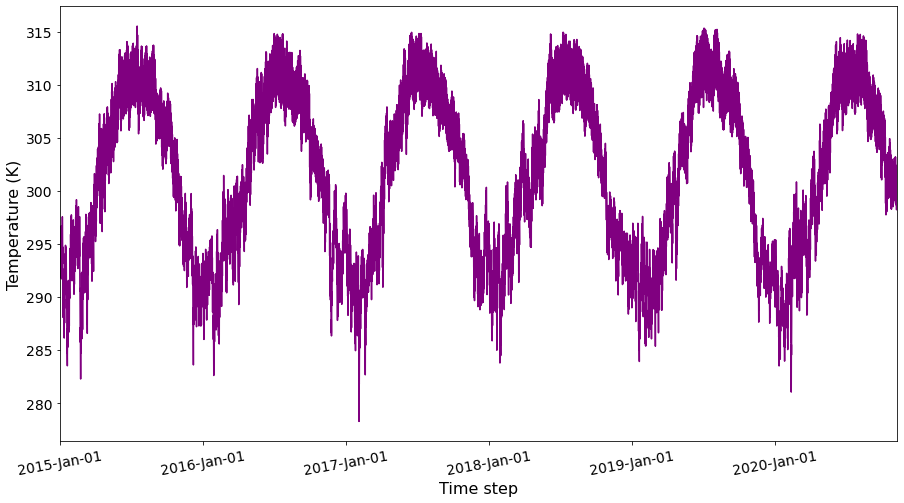

In [43]:
# Plot time series and a time frame of it
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df.index.values, df['Temperature'], color='purple')
# Set title and labels for axes
ax.set_xlabel('Time step', fontsize=16)
ax.set_ylabel('Temperature (K)', fontsize=16)
ax.set_xlim(min(df.index.values), max(df.index.values))
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=14)

# Set date format
date_form =mdates.DateFormatter('%Y-%b-%d')
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'./results/ts.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

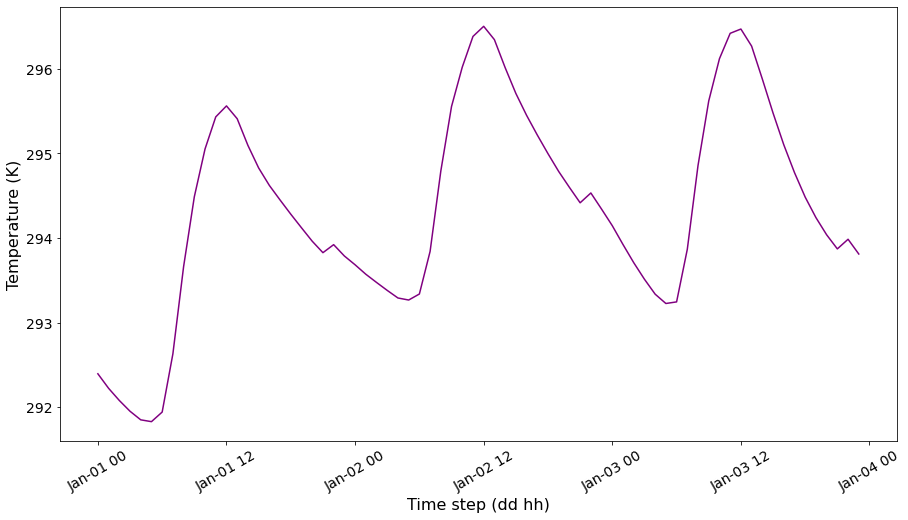

In [11]:
# Plot a time frame
frame = 3
tf = df[:frame*24][:] # three-day time frame

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(tf.index.values, tf['Temperature'], color='purple')
# Set title and labels for axes
ax.set_xlabel('Time step (dd hh)', fontsize=16)
ax.set_ylabel('Temperature (K)', fontsize=16)

plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)

# Set date format
date_form =mdates.DateFormatter('%b-%d %H')
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'./results/timeframe.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [90]:
## Forecast temperatue at 48 steps ahead
df = df[:-(6*24+22)][:]
start_index = 2400
lead_time = 48
train = df[-(start_index+lead_time):-lead_time][:]
test = df[-lead_time:][:]

y_hat_avg = test.copy()
print(test.head())
print ('computation started')

fit1 = ExponentialSmoothing(np.asarray(train['Temperature']), seasonal_periods=240, trend='add', seasonal='add').fit()
y_hat_avg['predict'] = fit1.forecast(len(test))
print ('computation completed')

print(' forecast for ', lead_time, ' steps ahead with seasonal additive')
print('RMSE: ', math.sqrt(mean_squared_error(y_hat_avg['predict'], test['Temperature'].values)))


                     Temperature
time                            
2019-12-30 16:00:00    293.89050
2019-12-30 17:00:00    293.72380
2019-12-30 18:00:00    293.58170
2019-12-30 19:00:00    293.44490
2019-12-30 20:00:00    293.30933
computation started
computation completed
 forecast for  48  steps ahead with seasonal additive
RMSE:  1.4931743384051661


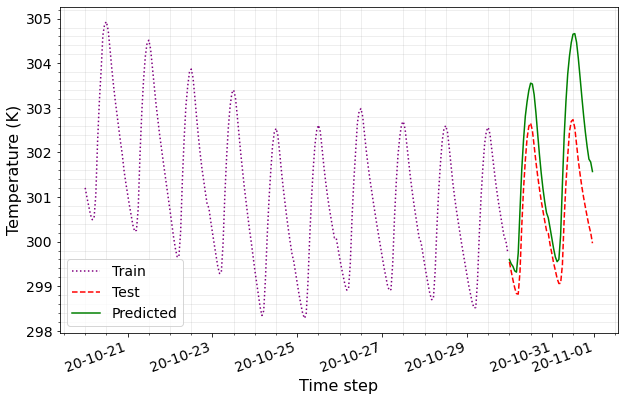

In [46]:
## Plot forecasting result
fig, ax = plt.subplots(figsize=(10, 6))

# Set label
ax.set_xlabel('Time step', fontsize=16)
ax.set_ylabel('Temperature (K)', fontsize=16)

# Plot
ax.plot(train['Temperature'][-240:], 'b:', label='Train', color='purple')
ax.plot(test['Temperature'], 'r--', label='Test', color='red')
ax.plot(y_hat_avg['predict'], 'k-', label='Predicted', color='green')

# Define the date format
date_form = mdates.DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.setp(ax.get_xticklabels(), rotation=20, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
#plt.grid(True)
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.savefig(r'./results/predict_48h.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2)

plt.show()
